# **Measure DUT and Apply Cal**

In [1]:
import skrf as rf
from skrf.vi.vna import PNA
import matplotlib.pyplot as plt
import calibration_functions as cf
from datetime import date
import time

rf.stylely()

### Initialize VNA

In [2]:
f_start = 9.5E9
f_stop = 10E9
f_npoints = int(201)

vna = PNA(address ='TCPIP0::10.236.73.132::inst0::INSTR')
time.sleep(3)
vna.reset()
vna.scpi.set_trigger_manual

meas_channel = 2

meas_S11 = 'S11'
vna.create_meas(meas_S11,'S11', channel = meas_channel) 

vna.set_frequency_sweep(f_start, 
                        f_stop, 
                        f_npoints, 
                        f_unit = 'Hz',
                        channel = meas_channel, 
                        )

### Take measurement

In [3]:
vna.sweep

measurement_S11 = vna.get_measurement(mname = meas_S11)

measurement = measurement_S11

### Create and apply cal

In [4]:
cal_folder = 'C:/Users/lab/Documents/Aaron/DARPA/Data/Aaron_Quick_Turn_Antenna/Test_Board_21-10-07/2021-10-07_SOL/'

cal = cf.make_SOL_cal(cal_folder)

measurement_corrected = cal.apply_cal(measurement)

c:\users\lab\documents\code\scikit-rf\skrf\network.py:3453: UserWarning: Using a frequency subset:
9500000000.0-10000000000.0 Hz, 41 pts
  warnings.warn("Using a frequency subset:\n" + str(ntwkA.frequency))


### Plot

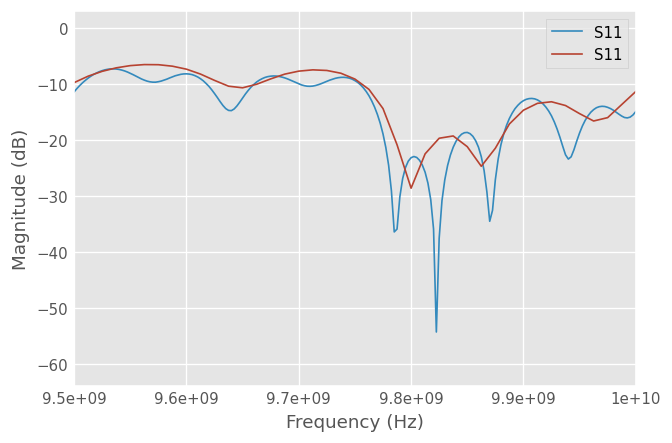

In [5]:
measurement.plot_s_db()
measurement_corrected.plot_s_db()

### Save measurement

In [7]:
data_folder = 'C:/Users/lab/Documents/Aaron/DARPA/Data/Aaron_Quick_Turn_Antenna/Test_Board_21-10-07/'

today = date.today()
date_str = today.strftime("%Y-%m-%d")

measurement_name = 'Board_Feed'

rf.write(data_folder + measurement_name + '_' + date_str + '.ntwk', measurement)
rf.write(data_folder + measurement_name + '_' + date_str + '_calibrated' + '.ntwk', measurement_corrected)